In [1]:
from preprocessor import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

#reading the data: Dataset is available in the datasets folder
data = pd.read_csv('~/ml/ml_models/datasets/health/Training.csv' )


prep = Preprocessor()
prep.overview(data)

Using TensorFlow backend.



Dataset contains 4920 rows and 133 columns

Data types of the raw (uncleaned) data:
itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

Categorical features of the dataset: ['prognosis']

Numeric features of the dataset: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweatin

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['prognosis'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


In [3]:
y = list(le_name_mapping.keys())

In [4]:
le_name_mapping.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

In [5]:
X = data.drop(['prognosis'],axis=1)
pre_y = data['prognosis']
y = pre_y.map(le_name_mapping)


In [6]:
x = list(data['prognosis'].unique())
x

['Fungal infection',
 'Allergy',
 'GERD',
 'Chronic cholestasis',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'AIDS',
 'Diabetes ',
 'Gastroenteritis',
 'Bronchial Asthma',
 'Hypertension ',
 'Migraine',
 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Dengue',
 'Typhoid',
 'hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Alcoholic hepatitis',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Dimorphic hemmorhoids(piles)',
 'Heart attack',
 'Varicose veins',
 'Hypothyroidism',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Osteoarthristis',
 'Arthritis',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Urinary tract infection',
 'Psoriasis',
 'Impetigo']

In [7]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, random_state= 42,test_size = 0.2)

In [7]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=200, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Accuracy on the training subset: {:3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(forest.score(X_test, y_test)))


Accuracy on the training subset: 0.998476
Accuracy on the testing subset: 1.000000


In [8]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from time import time

clf_A = LogisticRegression(solver='lbfgs',random_state = 42,multi_class='auto')
#clf_B = SVC(random_state = 912,kernel = 'rbf',gamma = 'scale')
clf_C = RandomForestClassifier(n_estimators = 100,max_depth = 10,random_state=82)


print('Logistic Regresssion...')
start  = time()
clf_A.fit(X_train, y_train)
end = time()
print('Done in {} seconds...'.format(end - start))
y_pred_A = clf_A.predict(X_test)
print("F1 Score: {}".format(f1_score(y_test,y_pred_A,average = 'macro')))
#print(classification_report(y_test,y_pred_A))
print('Accuracy on the training subset: {:3f}'.format(clf_A.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(clf_A.score(X_test, y_test)))
print('')

'''
print('Support Vector Machine...')
start  = time()
clf_B.fit(X_train, y_train)
end = time()
print('Done in {} seconds...'.format(end - start))
y_pred_B = clf_B.predict(X_test)
print("F1 Score: {}".format(f1_score(y_test,y_pred_B,average = 'macro')))
print('Accuracy on the training subset: {:3f}'.format(clf_B.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(clf_B.score(X_test, y_test)))
print('')
'''

print('Random Forest...')
start = time()
clf_C.fit(X_train, y_train)
end = time()
print('Done in {} seconds...'.format(end - start))
y_pred_C = clf_C.predict(X_test)
print("F1 Score: {}".format(f1_score(y_test,y_pred_C,average = 'macro')))
#print(classification_report(y_all,y_pred_C))
print('Accuracy on the training subset: {:3f}'.format(clf_C.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(clf_C.score(X_test, y_test)))
print('')


Logistic Regresssion...
Done in 1.1812646389007568 seconds...
F1 Score: 1.0
Accuracy on the training subset: 1.000000
Accuracy on the testing subset: 1.000000

Random Forest...
Done in 0.23975300788879395 seconds...
F1 Score: 0.996475216365067
Accuracy on the training subset: 0.999492
Accuracy on the testing subset: 0.995935



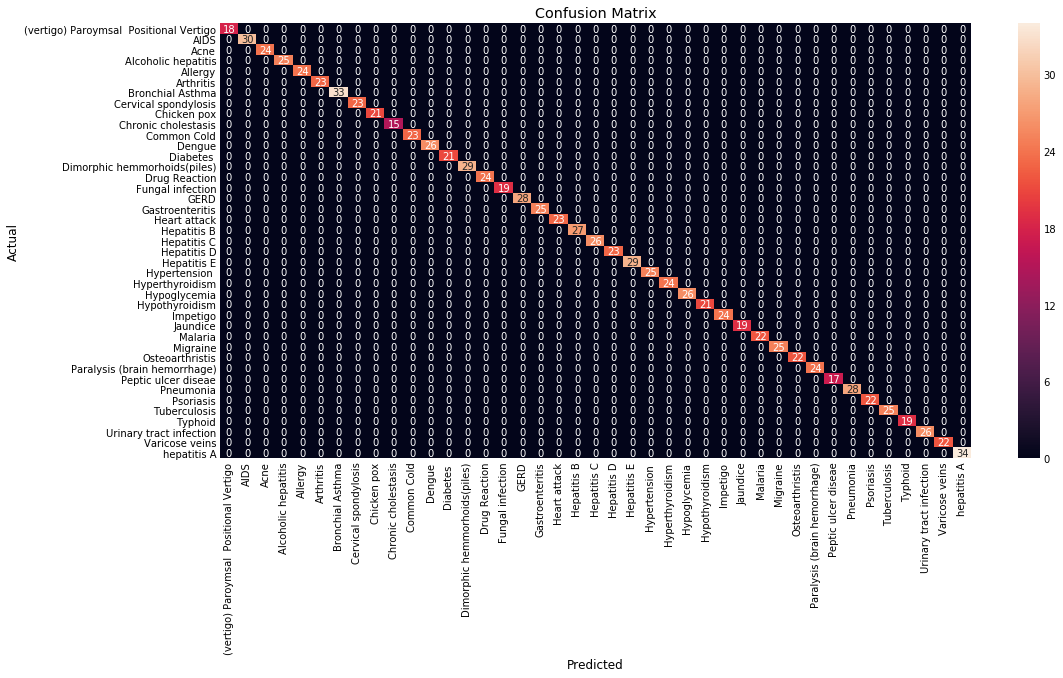

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax =ax); #annot= True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(y,rotation=90); ax.yaxis.set_ticklabels(y,rotation=0);


In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

y_train.shape

(3936, 41)

In [11]:
num_labels = 41
classifier = Sequential()
classifier.add(Dense(200, activation = 'relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(num_labels, activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=20,epochs=100, verbose=0)
print(f'Summary of the built model: {classifier.summary()}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               26600     
_________________________________________________________________
dense_5 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 41)                16441     
Total params: 123,441
Trainable params: 123,441
Non-trainable params: 0
_________________________________________________________________
Summary of the built model: None


In [9]:
eval_model = classifier.evaluate(X_train, y_train)
print(f'Model evaluation: {eval_model}')

3936/3936 [==============================] - 0s 39us/step
Model evaluation: [1.192698633767725e-07, 1.0]


In [10]:
pred = classifier.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test2 = np.argmax(y_test,axis=1)

                     symptoms
chills                    114
vomiting                  114
fatigue                   114
weight_loss               114
cough                     114
high_fever                114
breathlessness            114
sweating                  114
loss_of_appetite          120
mild_fever                120
yellowing_of_eyes         120
swelled_lymph_nodes       120
malaise                   120
phlegm                    120
chest_pain                120
blood_in_sputum           120


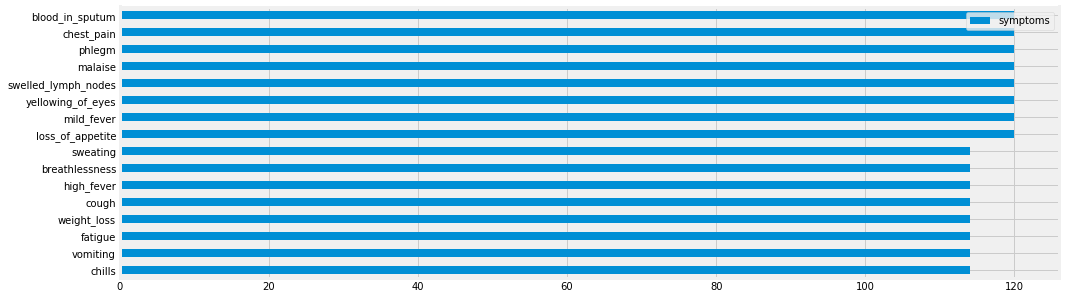

In [2]:
df = data.loc[data['prognosis'] == 'Tuberculosis']
df = df.drop('prognosis',axis=1)
y= df.sum(axis=0,skipna=True)
k = pd.DataFrame(y,columns = ['symptoms'])

kx = k.loc[~(k['symptoms'] == 0)]
#kx.reset_index()
print(kx)
kx.plot.barh(figsize=(15,5));


In [3]:
no_prognosis = data.drop('prognosis',axis=1)

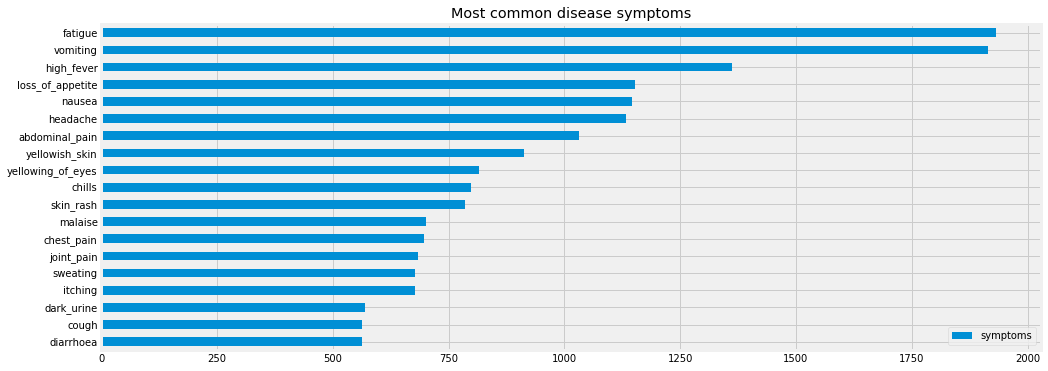

In [4]:

y= no_prognosis.sum(axis=0,skipna=True)
k = pd.DataFrame(y,columns = ['symptoms'])

kx = k.loc[~(k['symptoms'] == 0)]
many = kx[kx['symptoms'] > 500]
many_sorted = many.sort_values(by='symptoms')
#kx.reset_index()
many_sorted.plot.barh(title = 'Most common disease symptoms',figsize=(15,6));


In [34]:
# Task
'''
-Create a function that takes in a df and column and returns a dictionary of symptoms as keys and diseases as values
'''

(4920, 133)

{'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
import pandas as pd
from sklearn import preprocessing


#data = loadtxt('Training.csv',delimiter=",")
data = pd.read_csv('Training.csv' )
#X = data.iloc[:,0:133 ]
labels = data['prognosis'].copy()
df = data.drop(['prognosis'],axis=1)
#y = data.iloc[[133]]

le = preprocessing.LabelEncoder()
data['prognosis'] = le.fit_transform(data['prognosis'])
labels = data['prognosis'].copy()

#define the keras model
model = Sequential()
model.add(Dense(33, input_dim=133, activation='relu'))
#model.add(Dense(40, activation='relu'))
model.add(Dense(units='40', activation='sigmoid'))
#model.add(Dense(40, activation='softmax'))

#compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(x=df.values,y=labels.values ,epochs =10, batch_size= 10)

# evaluate the keras  model
_, accuracy = model.evaluate(X,y)
print('Accuracy: %.2f' % (accuracy*100))

#make class predictions with the model
predictions = model.predict_classes(X)

# summarize the first 100 cases
for i in range(100):
    print(f'{X[i].tolist() }=> { predictions[i] } (expected {y[i]})')
    
model.summary()

model.save(model.h5)
print("Saved model to disk")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [18]:
data.shape

(4920, 133)

In [8]:
data['prognosis']

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64